In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [32]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


# EDA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [34]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [35]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

 ['age', 'sex', 'cp', 'restecg', 'num']


In [36]:
print('No of numerical features: ',len(nf))
print('No of categorical features: ',len(cf))

No of numerical features:  5
No of categorical features:  9


In [37]:
for col in nf:
    print(col,' : ',df[col].nunique()) 

age  :  39
sex  :  2
cp  :  4
restecg  :  3
num  :  5


In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

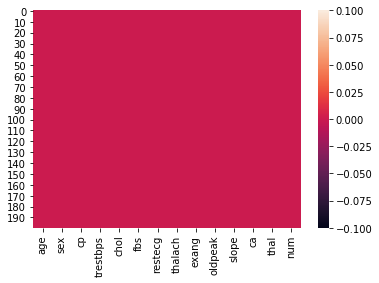

In [39]:
sns.heatmap(df.isnull())
plt.show()

# Statistics Summary

In [40]:
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [41]:
df.describe(include = ['O'])

,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal
count,200,200,200,200,200,200,200,200,200
unique,41,100,3,60,3,15,4,2,4
top,?,0,0,?,1,?,?,?,?
freq,56,49,125,53,95,56,102,198,166


In [42]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,23,62,0,1,8,1,11,1,1,3,2
1,44,1,4,17,28,0,1,21,0,1,3,1,3,0
2,60,1,4,18,35,0,1,30,1,6,2,1,3,2
3,55,1,4,24,45,0,1,35,1,10,0,1,3,1
4,66,1,3,5,31,1,2,58,1,5,1,1,3,0


# Data visualisation

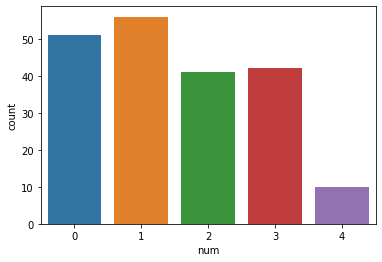

In [44]:
#univarite analysis
sns.countplot(df['num'])
plt.show()

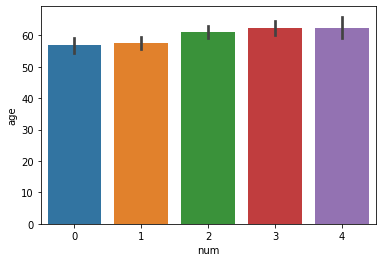

In [45]:
#bivariate analysis
sns.barplot(x='num',y='age',data=df) 
plt.show()

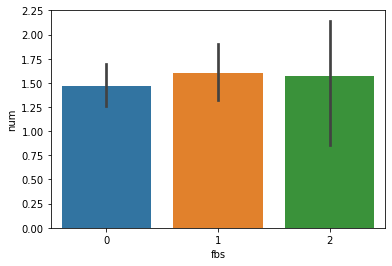

In [46]:
sns.barplot(x='fbs',y='num',data=df) 
plt.show() 

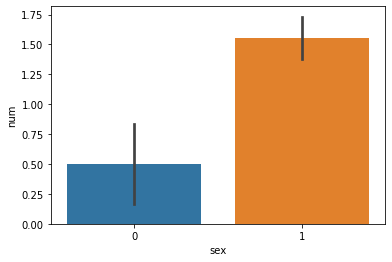

In [47]:
sns.barplot(x='sex',y='num',data=df) 
plt.show()

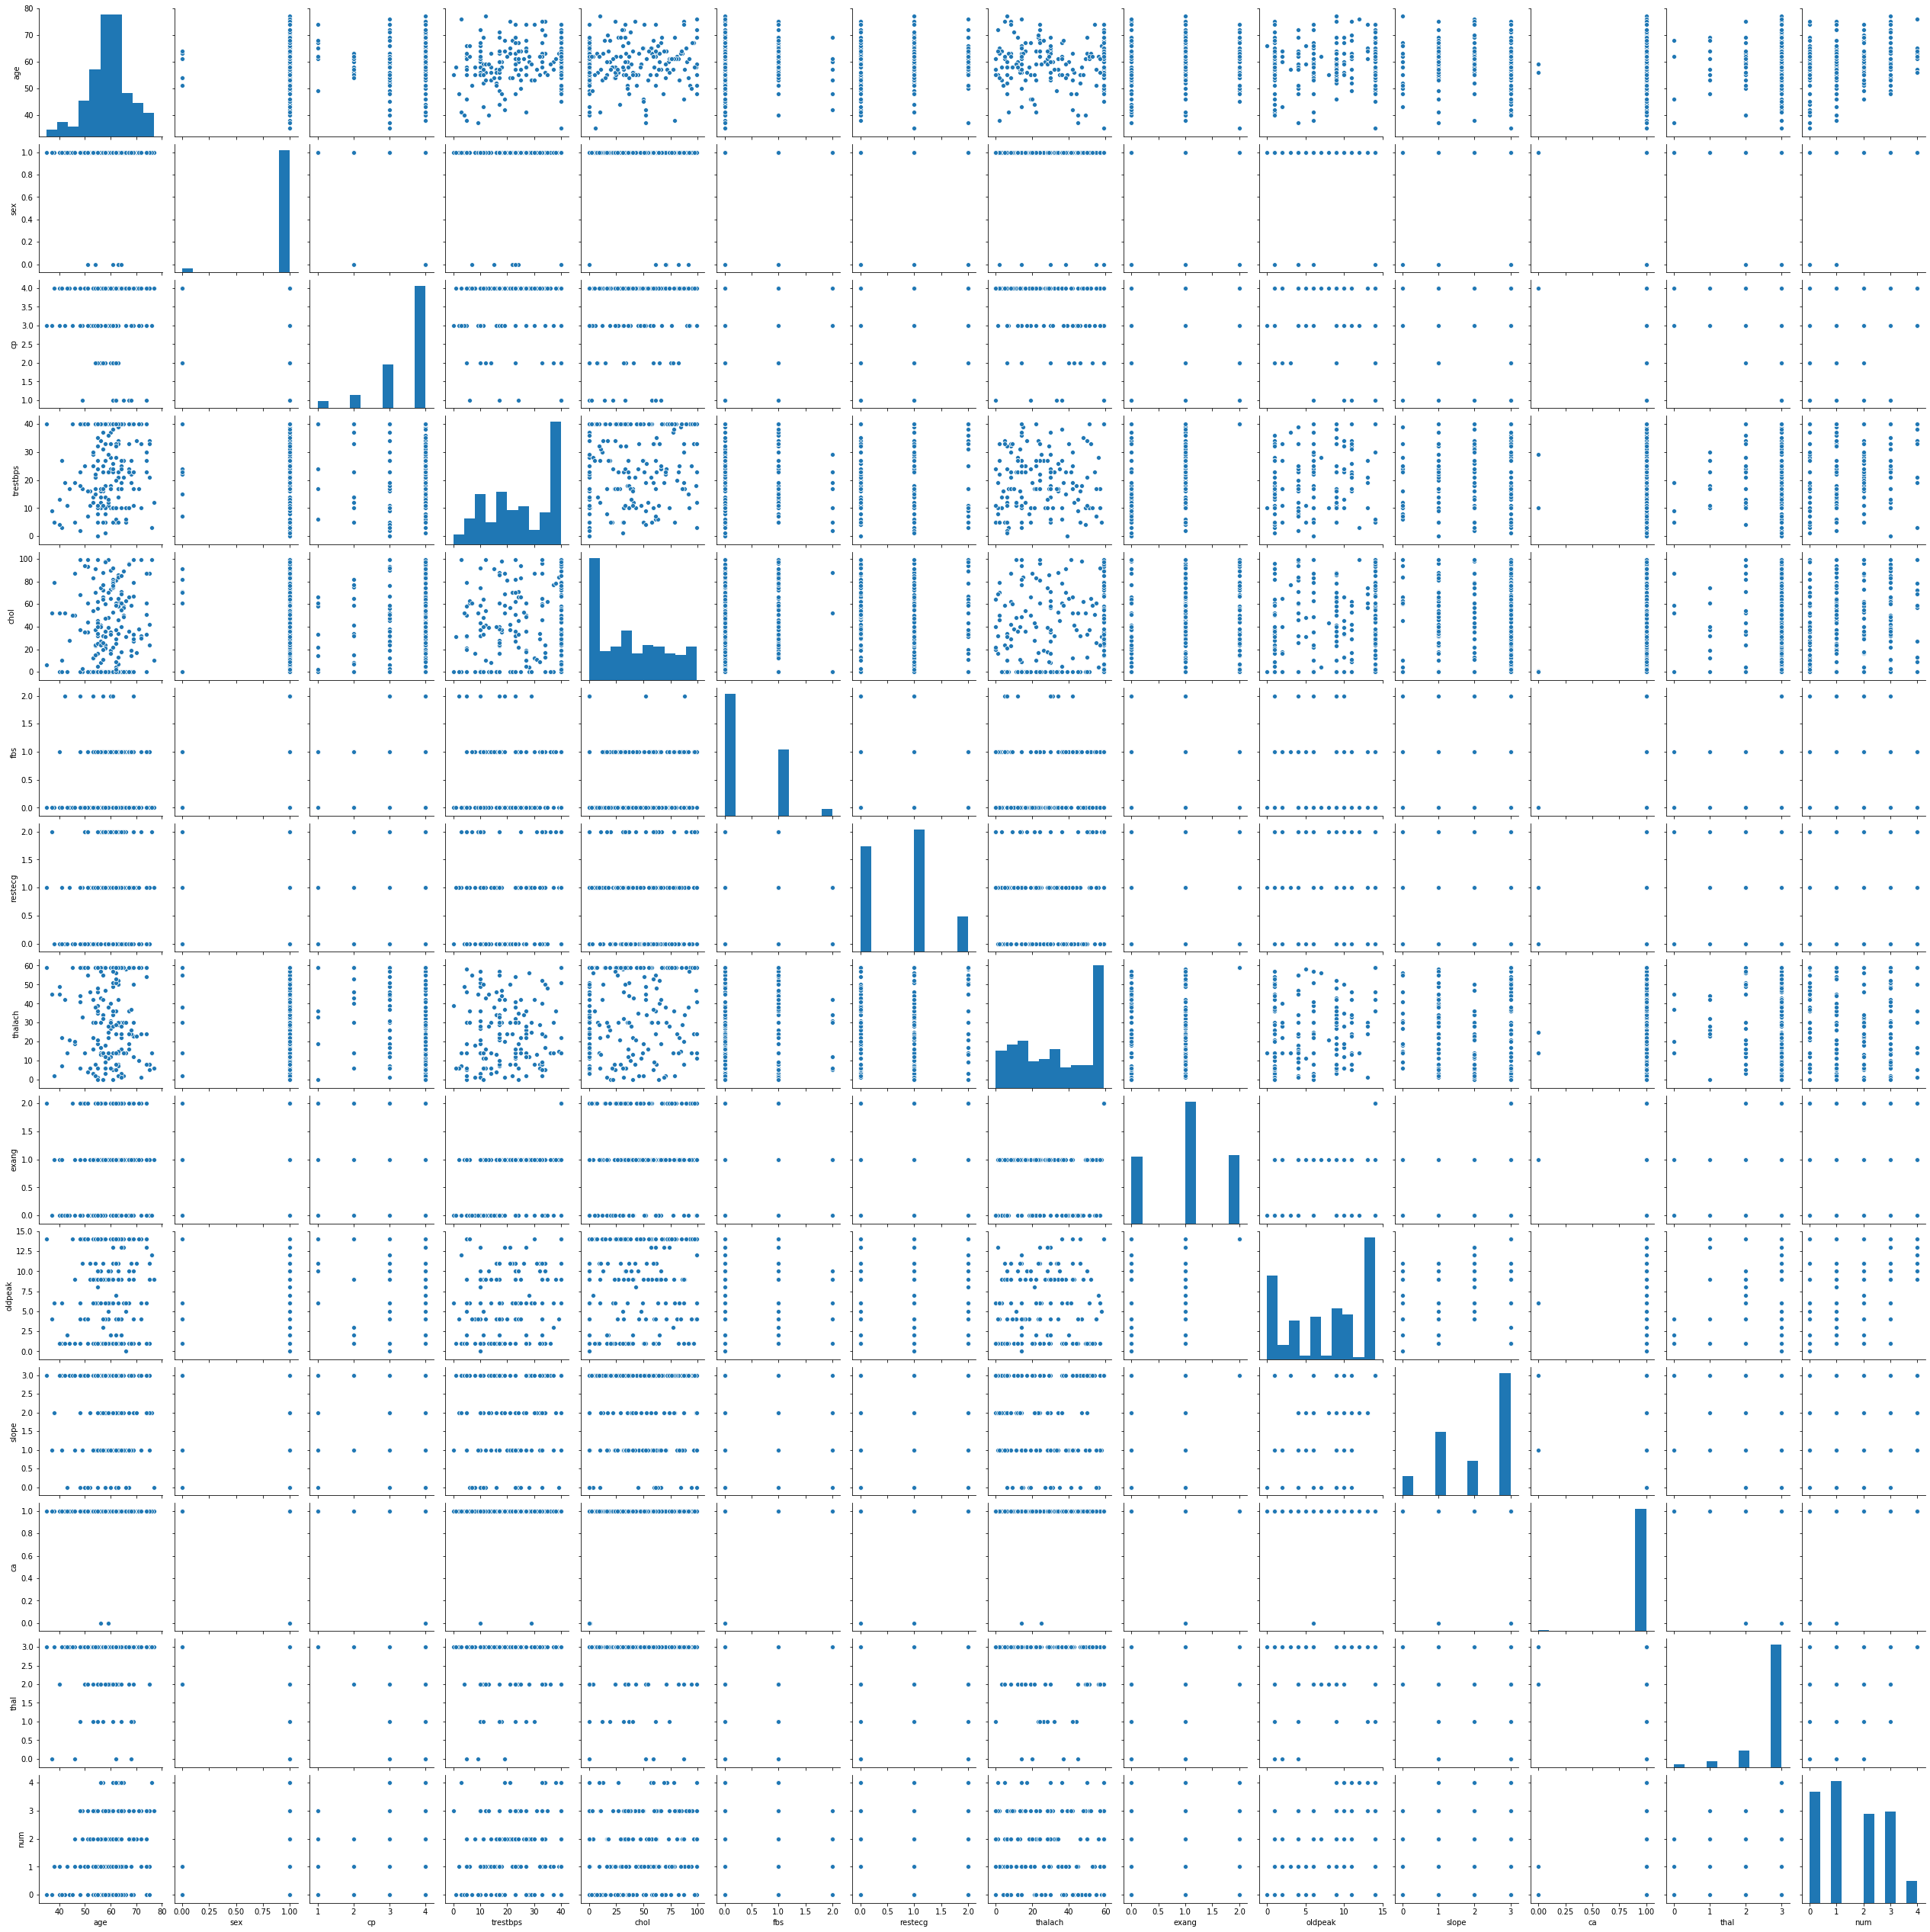

In [48]:
sns.pairplot(df)

In [49]:
#correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.148099,0.075774,0.056644,0.002400,-0.046396,0.082938,0.093662,-0.006737,0.023861,0.091226,0.287289
sex,0.034230,1.000000,0.038036,0.041150,-0.135882,-0.028341,0.060621,0.003599,0.041667,0.103045,0.042436,-0.017675,0.023543,0.147470
cp,-0.038280,0.038036,1.000000,-0.108668,0.103214,-0.049744,0.034790,-0.245349,-0.082640,-0.191398,-0.184734,-0.062680,-0.088548,0.168210
trestbps,0.148099,0.041150,-0.108668,1.000000,0.137591,0.047729,0.059974,0.535110,0.692549,0.596663,0.402865,0.042266,0.201645,0.089706
chol,0.075774,-0.135882,0.103214,0.137591,1.000000,0.066625,0.018638,0.121922,0.130986,0.098797,0.059616,0.116131,0.008680,0.139196
fbs,0.056644,-0.028341,-0.049744,0.047729,0.066625,1.000000,0.114645,0.048343,-0.103918,-0.027321,0.026010,0.073783,-0.050338,0.046811
restecg,0.002400,0.060621,0.034790,0.059974,0.018638,0.114645,1.000000,0.053506,-0.017562,-0.043575,0.123095,0.034644,-0.038291,-0.032800
thalach,-0.046396,0.003599,-0.245349,0.535110,0.121922,0.048343,0.053506,1.000000,0.561034,0.537406,0.379412,0.067382,0.098711,-0.134816
exang,0.082938,0.041667,-0.082640,0.692549,0.130986,-0.103918,-0.017562,0.561034,1.000000,0.709429,0.330265,0.000694,0.235572,0.070802
oldpeak,0.093662,0.103045,-0.191398,0.596663,0.098797,-0.027321,-0.043575,0.537406,0.709429,1.000000,0.196717,0.038791,0.272264,0.148194


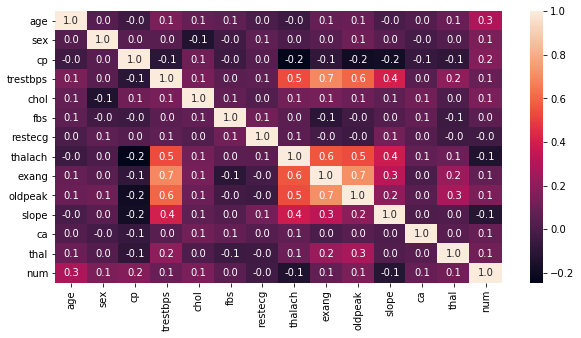

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True ,fmt='.1f')
plt.show()

# Data Cleaning

<Figure size 720x360 with 0 Axes>

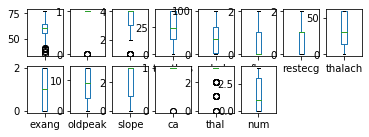

In [51]:
plt.figure(figsize=(10,5))
df.plot(kind='box',subplots=True,layout=(4,8)) 
plt.show()

In [52]:
from scipy.stats import zscore # removing outliers
z=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z<3).all(axis=1)]
print(df_final.shape)
df=df_final

(200, 14)
(179, 14)


In [53]:
classes_q = sorted(df.num.unique())
classes_q

[0, 1, 2, 3, 4]

In [54]:
y=df["num"]
dfx=df.drop(columns=['num'], axis=1)

In [55]:
dfx.skew()

age        -0.239248
sex         0.000000
cp         -1.373174
trestbps   -0.154060
chol        0.407519
fbs         0.997411
restecg     0.355700
thalach    -0.034242
exang      -0.016570
oldpeak    -0.152741
slope      -0.596130
ca          0.000000
thal       -2.564024
dtype: float64

In [56]:
# handling skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
d=pt.fit_transform(dfx)
d=pd.DataFrame(d,columns=dfx.columns)
x=d

In [57]:
x.skew()

age         0.015942
sex         0.000000
cp         -0.837232
trestbps   -0.251490
chol       -0.359749
fbs         0.537410
restecg    -0.032704
thalach    -0.291677
exang      -0.122010
oldpeak    -0.295855
slope      -0.395651
ca          0.000000
thal       -1.967875
dtype: float64

In [58]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.440476,0.0,0.672488,-0.108243,0.828720,-0.771897,0.495652,-1.227654,0.021287,0.641842,-1.115256,0.0,0.421457
1,-1.959915,0.0,0.672488,-0.591681,0.077782,-0.771897,0.495652,-0.455678,-1.445351,-1.467918,0.921136,0.0,0.421457
2,0.030007,0.0,0.672488,-0.509588,0.264575,-0.771897,0.495652,-0.018790,0.021287,-0.301752,-0.213490,0.0,0.421457
3,-0.628621,0.0,0.672488,-0.029582,0.496476,-0.771897,0.495652,0.204270,0.021287,0.463054,-1.750535,0.0,0.421457
4,0.862128,0.0,-1.400715,-1.652191,0.160856,1.255051,1.573730,1.115499,0.021287,-0.509524,-1.115256,0.0,0.421457


# Prediction using classification model

In [59]:
from sklearn import linear_model
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [60]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(119, 13) (60, 13)
(119,) (60,)


In [61]:
maxrscore=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=r_state)
    reg=linear_model.LinearRegression()
    reg.fit(x_train,y_train)
    y_pred= reg.predict(x_test)
    r2s=r2_score(y_test,y_pred)
    if r2s > maxrscore:
        maxrscore=r2s
        fr_state=r_state
print("max r2 score corresponding to ",fr_state," is ",maxrscore)

max r2 score corresponding to  49  is  0.1776994163461989


In [62]:
#GRID SEARCHCV
parameter = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
grid = GridSearchCV( estimator=SVC(), param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.kernel)
print(grid.best_params_)
s=grid.best_estimator_.kernel

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
linear
{'C': 10, 'kernel': 'linear'}


In [63]:
#GRID SEARCHCV
parameter = {'n_neighbors':(3,5,7,9,11), 'weights':['uniform','distance']}
knn = KNeighborsClassifier()
grid = GridSearchCV( estimator=knn, param_grid = parameter)
grid.fit(x, y)
print(grid)
#print(grid.best_score)
print(grid.best_estimator_.n_neighbors)
print(grid.best_estimator_.weights)
print(grid.best_params_)
k=grid.best_estimator_.n_neighbors
w=grid.best_estimator_.weights

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 7, 9, 11),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
3
uniform
{'n_neighbors': 3, 'weights': 'uniform'}


In [65]:
KNN=KNeighborsClassifier(n_neighbors=k,weights=w)
SV=SVC(kernel=s)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=fr_state)
GNB=GaussianNB()
XGBC=GradientBoostingClassifier()
RFC=RandomForestClassifier()

In [66]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', XGBC))

In [67]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

In [68]:
y_pred=y_pred.astype('int16')

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


Accuracy_score =  0.2833333333333333


Cross_Val_Score =  0.27941176470588236


roc_auc_score =  0.5275008915896783


classification_report
               precision    recall  f1-score   support

           0       0.43      0.69      0.53        13
           1       0.32      0.32      0.32        19
           2       0.17      0.17      0.17        12
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         6

    accuracy                           0.28        60
   macro avg       0.18      0.23      0.20        60
weighted avg       0.23      0.28      0.25        60



[[9 2 2 0 0]
 [6 6 3 4 0]
 [3 4 2 3 0]
 [2 5 3 0 0]
 [1 2 2 1 0]]


AxesSubplot(0.125,0.808774;0.62x0.071226

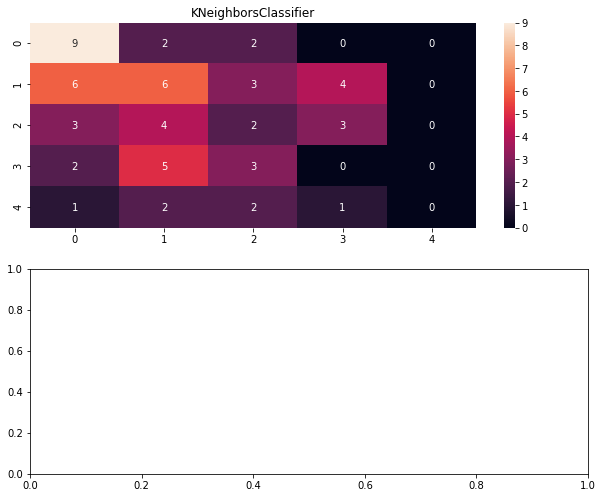

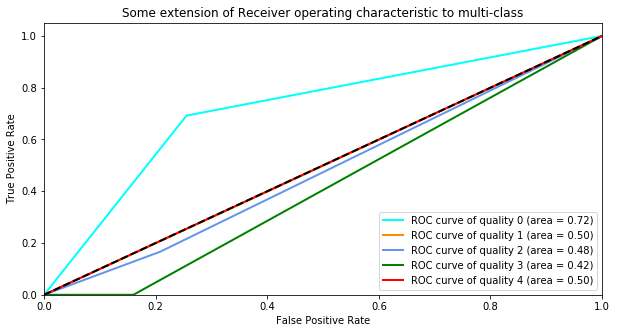




*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score =  0.26666666666666666


Cross_Val_Score =  0.29084967320261434


roc_auc_score =  0.5297918128721669


classification_report
               precision    recall  f1-score   support

           0       0.33      0.38      0.36        13
           1       0.40      0.32      0.35        19
           2       0.27      0.25      0.26        12
           3       0.06      0.10      0.07        10
           4       1.00      0.17      0.29         6

    accuracy                           0.27        60
   macro avg       0.41      0.24      0.27        60
weighted avg       0.36      0.27      0.28        60



[[5 0 1 7 0]
 [6 6 4 3 0]
 [2 3 3 4 0]
 [1 5 3 1 0]
 [1

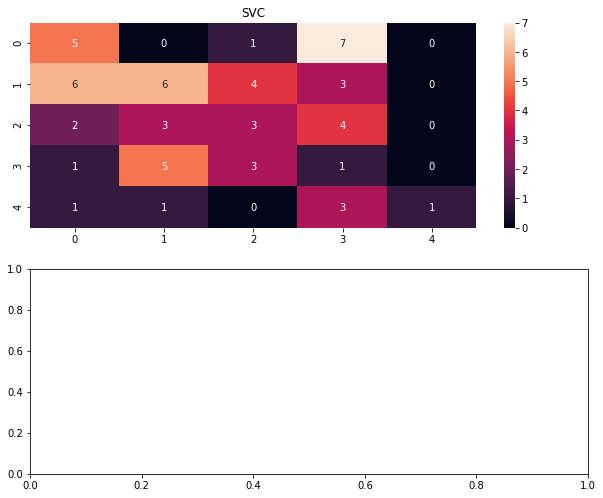

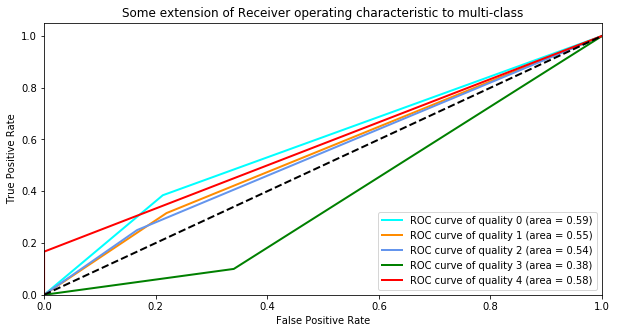




*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.2833333333333333


Cross_Val_Score =  0.3130718954248366


roc_auc_score =  0.541460759174092


classification_report
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        13
           1       0.40      0.32      0.35        19
           2       0.21      0.25      0.23        12
           3       0.12      0.20      0.15        10
           4       1.00      0.17      0.29         6

    accuracy                           0.28        60
   macro avg       0.42      0.26      0.28        60
weighted avg       0.37    

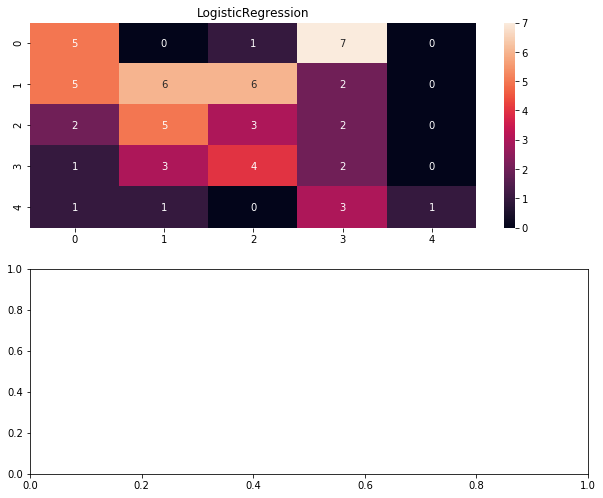

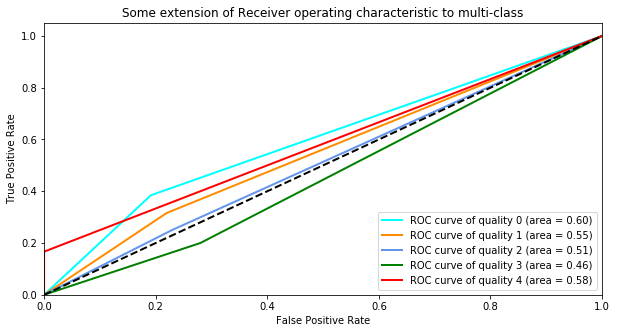




*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=49, splitter='best')


Accuracy_score =  0.35


Cross_Val_Score =  0.26830065359477123


roc_auc_score =  0.5753236026492589


classification_report
               precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.50      0.42      0.46        19
           2       0.55      0.50      0.52        12
           3       0.20      0.40      0.27        10
           4       0.00      0.00      0.00         6

    accuracy                           0.35 

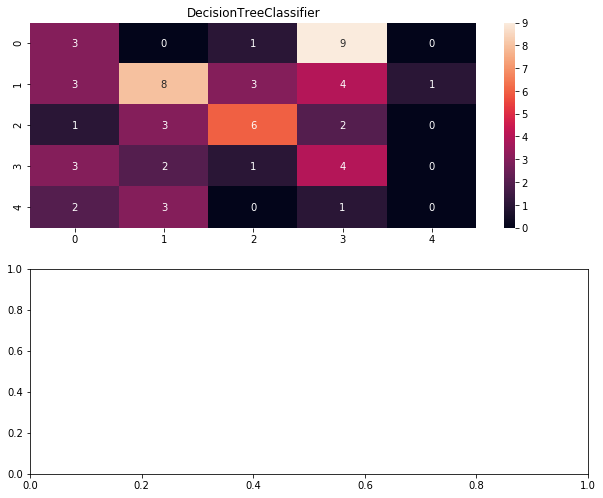

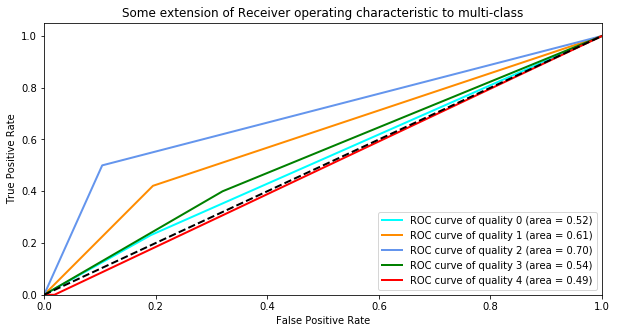




*********************** GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score =  0.3


Cross_Val_Score =  0.2065359477124183


roc_auc_score =  0.5814393930116898


classification_report
               precision    recall  f1-score   support

           0       0.60      0.23      0.33        13
           1       0.47      0.37      0.41        19
           2       0.20      0.17      0.18        12
           3       0.25      0.10      0.14        10
           4       0.19      0.83      0.31         6

    accuracy                           0.30        60
   macro avg       0.34      0.34      0.28        60
weighted avg       0.38      0.30      0.29        60



[[3 4 1 0 5]
 [1 7 5 1 5]
 [1 3 2 1 5]
 [0 1 2 1 6]
 [0 0 0 1 5]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


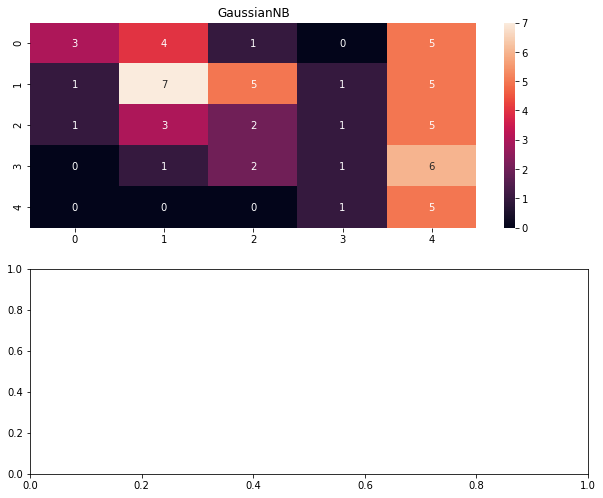

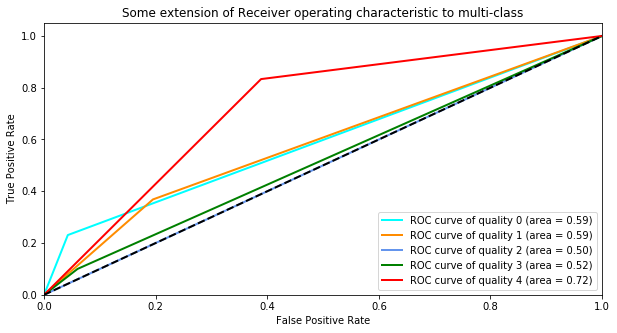




*********************** RandomForestClassifier ***********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.2833333333333333


Cross_Val_Score =  0.2738562091503268


roc_auc_score =  0.5261143168937873


classification_report
               precision    recall  f1-score   support

           0       0.33      0.23      0.27        13
           1       0.32      0.42      0.36        19
           2       0.33      0.42      0.37        12
           3      

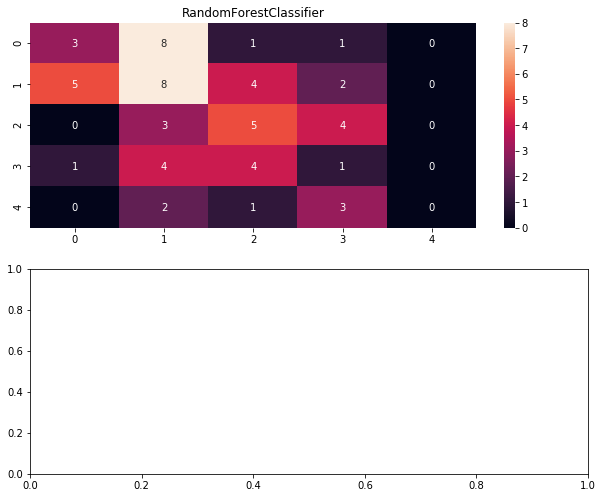

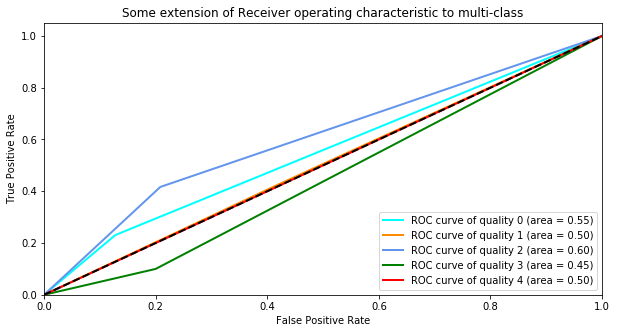




*********************** GradientBoostingClassifier ***********************


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Accuracy_score =  0.25


Cross_Val_Score =  0.2849673202614379


roc_auc_score =  0.5084254219887671


classification_report
               precision    recall  f1-score   support

           0       0.29      0.31      0

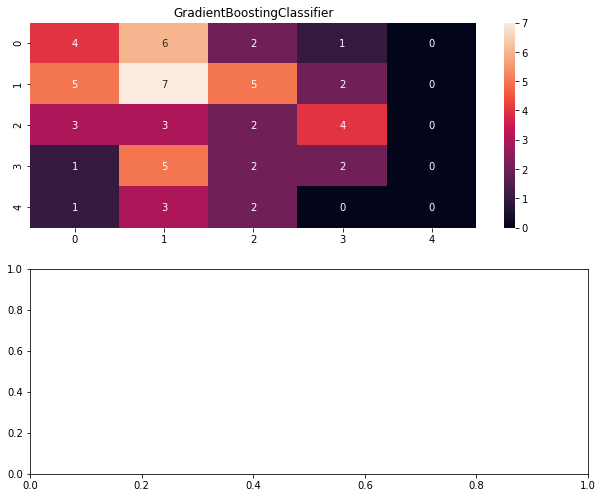

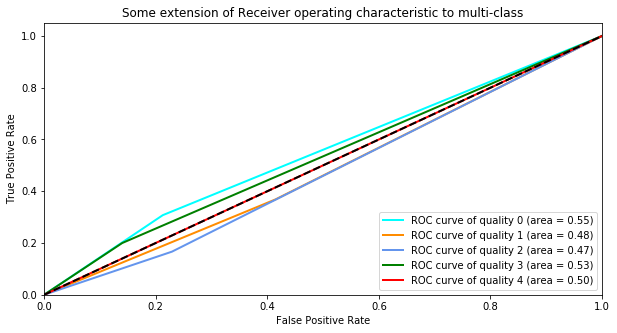

In [69]:
Model = []
score = []
cvs=[]
rocscore=[]

fpr = dict()
tpr = dict()
roc_auc = dict()
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    #For ROC curves we have to binarize lables
    y_test_bin = label_binarize(y_test, classes=classes_q)
    y_pred_bin = label_binarize(pre, classes=classes_q)
    for i in range(len(classes_q)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes_q))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes_q)):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(classes_q)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    #for average of roc_auc
    l=len(roc_auc)
    for i in range(l):
        sroc=sum(roc_auc.values())
    froc=sroc/l
    print ('roc_auc_score = ',froc)
    rocscore.append(froc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.figure(figsize=(10,5))
    
    colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'magenta']
    for i, color in zip(range(len(classes_q)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                   label='ROC curve of quality {0} (area = {1:0.2f})'
                       ''.format(classes_q[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    print('\n\n')

In [70]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Rou_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Rou_auc_score
0,KNeighborsClassifier,28.333333,27.941176,52.750089
1,SVC,26.666667,29.084967,52.979181
2,LogisticRegression,28.333333,31.307190,54.146076
3,DecisionTreeClassifier,35.000000,26.830065,57.532360
4,GaussianNB,30.000000,20.653595,58.143939
5,RandomForestClassifier,28.333333,27.385621,52.611432
6,GradientBoostingClassifier,25.000000,28.496732,50.842542


# Saving the best model

In [71]:
from sklearn.externals import joblib

In [72]:
joblib.dump(LR,'wine.pkl')

['wine.pkl']

In [73]:
model=joblib.load('wine.pkl')

In [74]:
model.predict(x_test.head())

array([3, 0, 3, 3, 1], dtype=int64)